In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [24]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Food Delivery/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Food Delivery/test.csv")

# New Section

In [94]:
train.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46


In [95]:
train.shape

(45593, 20)

In [96]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [25]:
train.replace({"NaN": np.nan}, regex=True, inplace = True)

In [26]:
train.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [27]:
from math import radians, cos, sin, asin, sqrt

In [28]:
def distance_calculate(lat1,lon1,lat2,lon2):
  lat1=radians(lat1)
  lon1=radians(lon1)
  lat2=radians(lat2)
  lon2=radians(lon2)
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * asin(sqrt(a))
  r=6371
  return(c * r)

In [29]:
for i in range(len(train)):
  train.loc[i, 'Distance'] = distance_calculate(train.loc[i, 'Restaurant_latitude'],
                                        train.loc[i, 'Restaurant_longitude'],
                                        train.loc[i,'Delivery_location_latitude'],
                                        train.loc[i,'Delivery_location_longitude'])


In [30]:
for i in range(len(test)):
  test.loc[i, 'Distance'] = distance_calculate(test.loc[i, 'Restaurant_latitude'],
                                        test.loc[i, 'Restaurant_longitude'],
                                        test.loc[i,'Delivery_location_latitude'],
                                        test.loc[i,'Delivery_location_longitude'])

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

#EDA

Dealing with Time factor

In [31]:
time = train['Time_taken(min)']

for i in range(len(train)):
  train.loc[i, 'Time'] =time[i].replace('(min) ','')


In [122]:
#train.loc[train['Time']==None]

Dealing with Age factor

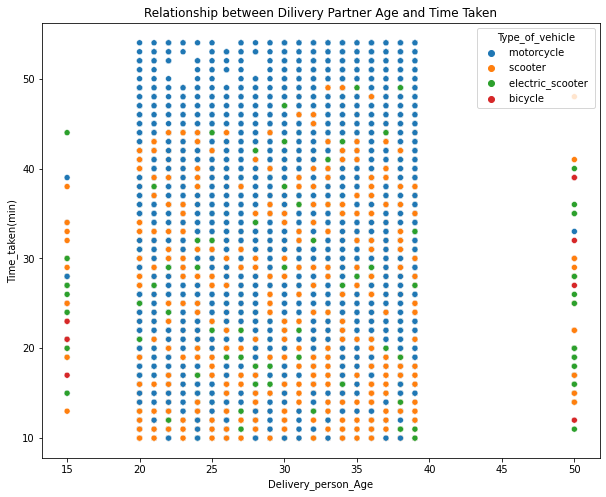

In [32]:


age = train['Delivery_person_Age'].astype(float)
time = train['Time'].astype(float)
plt.figure(figsize=(10, 8))
sns.scatterplot(data= train,x=age,y=time,hue=train['Type_of_vehicle'])
plt.xlabel('Delivery_person_Age')
plt.ylabel('Time_taken(min)')
plt.title('Relationship between Dilivery Partner Age and Time Taken')



plt.show()

Drop "Time_taken(min)" column

In [34]:
train.drop('Time_taken(min)',axis = 1,inplace = True)
train.drop('ID',axis = 1,inplace = True)
train.drop('Delivery_person_ID',axis = 1,inplace = True)
train.drop('Order_Date',axis = 1,inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  object 
 1   Delivery_person_Ratings      43685 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Time_Orderd                  43862 non-null  object 
 7   Time_Order_picked            45593 non-null  object 
 8   Weatherconditions            44977 non-null  object 
 9   Road_traffic_density         44992 non-null  object 
 10  Vehicle_condition            45593 non-null  int64  
 11  Type_of_order                45593 non-null  object 
 12  Type_of_vehicle              45593 non-null  object 
 13  multiple_deliver

In [35]:
train.isna().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Distance                          0
Time                              0
dtype: int64

In [ ]:
def clean_nulls(data):
  
  
df['Sale'].fillna(int(df['Sale'].mean()), inplace=True)

Change formats to (float)

In [36]:
train['Delivery_person_Ratings']=train['Delivery_person_Ratings'].astype(float)

train['Time']=train['Time'].astype(float)
train['Delivery_person_Age']=train['Delivery_person_Age'].astype(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  float64
 1   Delivery_person_Ratings      43685 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Time_Orderd                  43862 non-null  object 
 7   Time_Order_picked            45593 non-null  object 
 8   Weatherconditions            44977 non-null  object 
 9   Road_traffic_density         44992 non-null  object 
 10  Vehicle_condition            45593 non-null  int64  
 11  Type_of_order                45593 non-null  object 
 12  Type_of_vehicle              45593 non-null  object 
 13  multiple_deliver

Dealing with Ratings factor

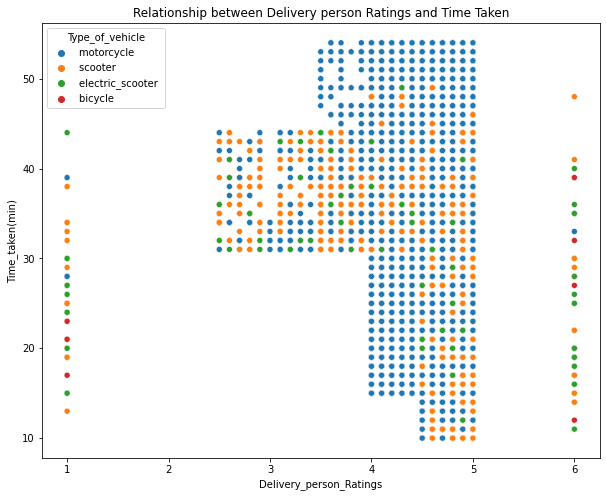

In [37]:
Ratings = train['Delivery_person_Ratings']
time = train['Time']
plt.figure(figsize=(10, 8))
sns.scatterplot(data= train,x=Ratings,y=time,hue=train['Type_of_vehicle'])
plt.xlabel('Delivery_person_Ratings')
plt.ylabel('Time_taken(min)')
plt.title('Relationship between Delivery person Ratings and Time Taken')



plt.show()

In [112]:
print(train.Delivery_person_Ratings)

0        4.9
1        4.5
2        4.4
3        4.7
4        4.6
        ... 
45588    4.8
45589    4.6
45590    4.9
45591    4.7
45592    4.9
Name: Delivery_person_Ratings, Length: 45593, dtype: float64


In [113]:
train.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Distance                          0
Time                              0
dtype: int64

In [38]:
train[train.isnull().any(axis=1)]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time
17,34.0,4.9,17.426228,78.407495,17.496228,78.477495,20:40:00,20:50:00,conditions Cloudy,Jam,0,Snack,motorcycle,NaN,No,Metropolitian,10.757109,41.0
42,NaN,NaN,19.121999,72.908493,19.201999,72.988493,NaN,18:35:00,conditions Cloudy,Medium,1,Drinks,scooter,1,No,Metropolitian,12.236724,33.0
58,32.0,4.5,26.888420,75.800689,26.898420,75.810689,09:25:00,09:40:00,conditions Windy,Low,2,Buffet,scooter,0,No,NaN,1.489927,20.0
74,NaN,NaN,12.935662,77.614130,12.975662,77.654130,NaN,15:30:00,NaN,NaN,1,Drinks,scooter,0,No,Metropolitian,6.210590,19.0
86,39.0,4.8,18.516216,73.842527,18.566216,73.892527,21:55:00,22:10:00,conditions Stormy,Jam,1,Meal,motorcycle,NaN,No,Metropolitian,7.661331,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45519,NaN,NaN,27.160934,78.044095,27.170934,78.054095,NaN,09:05:00,NaN,NaN,3,Meal,electric_scooter,1,No,Urban,1.488329,17.0
45526,NaN,NaN,26.913987,75.752891,27.023987,75.862891,20:35:00,20:45:00,conditions Cloudy,Jam,2,Snack,scooter,0,No,Metropolitian,16.384334,48.0
45550,23.0,4.6,22.753659,75.903365,22.763659,75.913365,08:40:00,08:45:00,conditions Cloudy,Low,2,Snack,scooter,1,No,NaN,1.512556,12.0
45566,NaN,NaN,21.185047,72.808590,21.205047,72.828590,NaN,10:50:00,conditions Windy,Low,2,Meal,scooter,0,No,Urban,3.040555,12.0


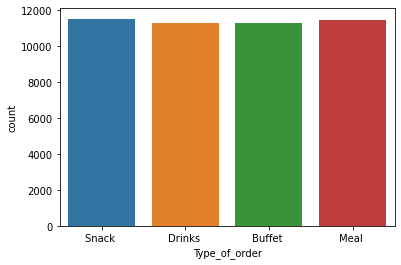

In [115]:
sns.countplot(data=train,x=train['Type_of_order'])


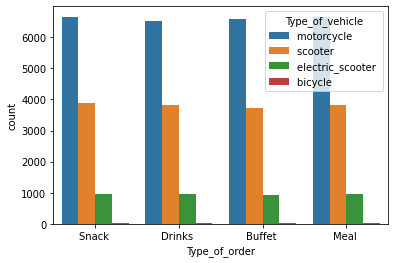

In [116]:
sns.countplot(x=train['Type_of_order'],hue=train['Type_of_vehicle'])

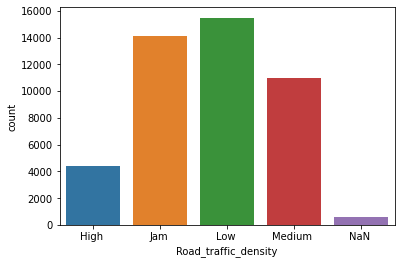

In [14]:
sns.countplot(x=train['Road_traffic_density'])

In [1]:
plt.figure(figsize=(20, 8))
#sns.countplot(x=train['Weatherconditions'])

sns.boxplot(x="Weatherconditions", y="Time", data=train)

NameError: ignored

In [42]:
sns.swarmplot(x = train.loc[train["Weatherconditions"]== 'condition Sunny'], y = train["Time"],data =train, dodge = True)

ValueError: ignored

In [ ]:
def order_time_cal(time_taken,pickup_time):
  order_time = pickup_time - pd.Timedelta(minutes=time_taken)
  return order_time


In [ ]:
for col in ['Time_Orderd']:
    if train[col].isnull().any():
        train = order_time_cal(train, col, 'col1', 'col2')

In [ ]:
def clean(data):
    data = data.drop(["ID", "Delivery_person_ID", "Order_Date","Time_taken(min)"], axis=1,inplace = True)
    
    num_cols = ["multiple_deliveries", "Festival"]
    str_cols = ["Road_traffic_density", "Weatherconditions", "City"]
    age = ['Delivery_person_Age']
    rating = ['Delivery_person_Ratings']

    for col in num_cols:
        data[col].fillna(data[col].mode(), inplace=True)

    for col in str_cols:
        data[col].fillna(data[col].mode(), inplace=True)    
    
    
    data['Delivery_person_Age']=data['Delivery_person_Age'].mode()[0]
    data['Delivery_person_Ratings']=data['Delivery_person_Ratings'].var()[0]


    return data


In [4]:
#Dummy values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ["Type_of_vehicle", "Type_of_order","Road_traffic_density", "Weatherconditions", "City"]

for col in columns:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    print(le.classes_)

['bicycle ' 'electric_scooter ' 'motorcycle ' 'scooter ']
['Buffet ' 'Drinks ' 'Meal ' 'Snack ']


In [12]:
train.

AttributeError: ignored